# IBM Data Science - Capstone Project
This Jupyter Notebook is part of the Final Assignment from __Coursera & IBM Data Science Professional Certificate__

#### First of all, let's import the libraries we gonna use in this project.

In [1]:
import pandas as pd
import folium
import seaborn as sbn
import numpy as np
import geopy.geocoders
import chardet
import json
from geopy.geocoders import Nominatim

#### I'm gonna import the dataset of all companies located in Recife from the city data portal. The csv file is separated by semicolon, so we use the aditional attribute to read the file properly.

In [2]:
url = "http://dados.recife.pe.gov.br/dataset/eb9b8a72-6e51-4da2-bc2b-9d83e1f198b9/resource/e7beb70e-6298-43b0-9917-19c1458e924c/download/empresas_enderecos.csv"
df = pd.read_csv(url, sep=";")
df

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cod_empresa,razao_social,nome_fantasia,cod_logradouro,nome_logradouro,numero,cod_bairro,nome_bairro,situacao_empresa,data_inicio,data_encerramento,latitude,longitude
0,7917,ASSOCIACAO DE MORADORES DE VILA AEROMOCA,NaN,75078,Rua Aiquara,25.0,884,COHAB,ATIVO,01-04-1993 00:00:00.000,NaN,NaN,NaN
1,6268,ANDRE TEIXEIRA DOS SANTOS,FOCUS,25500,Rua Frei Francisco Sampaio,103.0,884,COHAB,ATIVO,30-07-2010 00:00:00.000,NaN,NaN,NaN
2,6310,L C GOMES DA SILVA SERVICOS EM TECNOLOGIA - ME,L C GOMES DA SILVA SUPORTE TECNICO E OUTROS SE...,40207,Rua Cônego Luiz Vieira,71.0,884,COHAB,ATIVO,11-01-2016 00:00:00.000,NaN,NaN,NaN
3,1873,RAPHAEL CAVALCANTI DOS SANTOS TELECOMUNICAÇÕES ME,IGUANANET,20133,Rua Domingos Antônio Jorge,83.0,884,COHAB,ATIVO,09-03-2012 00:00:00.000,NaN,NaN,NaN
4,7904,RF COMERCIO DE EQUIPAMENTOS DE TELEFONIA EIRELI,NaN,56707,Rua Raposo Tavares,88.0,884,COHAB,ATIVO,29-05-2018 11:15:03.557,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95112,9173,QUALIGAS EIRELI,QUALIGAS,65803,Rua Jornalista Wilson Lustosa,17.0,590,DOIS IRMAOS,ATIVO,26-01-2016 00:00:00.000,NaN,-8.014454,-34.940967
95113,3427,CARLOS LUCIANO ALVES PEDROZA PUBLICIDADE ME,MAIS PUBLICIDADE,49441,Estrada do Passarinho,NaN,590,DOIS IRMAOS,ATIVO,30-04-2015 00:00:00.000,NaN,NaN,NaN
95114,640,BARAUNA MARMORES E GRANITOS LTDA,NaN,20001,Rua Dois Irmãos,1020.0,590,DOIS IRMAOS,ATIVO,01-06-1998 00:00:00.000,NaN,-8.015593,-34.941562
95115,7307,IN SITU ANALITICA LTDA ME,NaN,20001,Rua Dois Irmãos,1020.0,590,DOIS IRMAOS,ATIVO,30-06-1995 00:00:00.000,NaN,-8.015593,-34.941562


#### There is some unimportant columns in the dataset, so we need to drop these columns and rename the remaining for better understanding. Also, we gonna get rid of the rows with no company name or address.

In [3]:
df.drop(["cod_empresa",
         "situacao_empresa",
         "data_inicio",
         "data_encerramento",
         "razao_social",
         "numero",
         "cod_logradouro"], axis=1, inplace=True)
df.rename(columns={"nome_fantasia":"company_name",
                   "nome_bairro":"neighborhood",
                   "nome_logradouro":"address"}, inplace=True)
df.dropna(subset=["company_name"],inplace=True)
df.dropna(subset=["address"],inplace=True)
df

,company_name,address,cod_bairro,neighborhood,latitude,longitude
1,FOCUS,Rua Frei Francisco Sampaio,884,COHAB,NaN,NaN
2,L C GOMES DA SILVA SUPORTE TECNICO E OUTROS SE...,Rua Cônego Luiz Vieira,884,COHAB,NaN,NaN
3,IGUANANET,Rua Domingos Antônio Jorge,884,COHAB,NaN,NaN
5,AUTO PECAS E SERVICOS CERTOS,Rua Azevedo Cruz,884,COHAB,NaN,NaN
6,SANTANA BOLSAS E ACESSORIOS,Rua Eduardo Guimarães,884,COHAB,NaN,NaN
...,...,...,...,...,...,...
95110,SERTAO LANCHES,Rua Jornalista Wilson Lustosa,590,DOIS IRMAOS,NaN,NaN
95111,NOVO GAS NORDESTE,Rua Jornalista Wilson Lustosa,590,DOIS IRMAOS,NaN,NaN
95112,QUALIGAS,Rua Jornalista Wilson Lustosa,590,DOIS IRMAOS,-8.014454,-34.940967
95113,MAIS PUBLICIDADE,Estrada do Passarinho,590,DOIS IRMAOS,NaN,NaN


#### Now, we gonna try to find all the bakery places in the city searching for keywords related to bread inside the companies names.

In [4]:
dfbakery = df[df['company_name'].str.contains("PADARIA|PÃO|BAKERY|DELICAT|PANIFIC|PAN |PANJOVEM|MERCEARIA", na=False)].reset_index(drop=True)
dfbakery

,company_name,address,cod_bairro,neighborhood,latitude,longitude
0,PANIFICADORA VITORIA,Rua Marechal Taumaturgo,884,COHAB,NaN,NaN
1,MERCEARIA VEM CA,Rua Marechal Taumaturgo,884,COHAB,NaN,NaN
2,PANIFICADORA SAO FRANCISCO,Rua Expedicionário Francisco Vitoriano,884,COHAB,NaN,NaN
3,PANIFICADORA KARINI,Rua Expedicionário Francisco Vitoriano,884,COHAB,NaN,NaN
4,PADARIA SANTA TEREZA,Rua Santa Tereza,400,PASSARINHO,NaN,NaN
...,...,...,...,...,...,...
475,PANIFICADORA PAO DO CEU,Rua Dr Benigno Jordao de Vasconcelos,884,COHAB,NaN,NaN
476,PANIFICADORA N S DO ROSARIO,Rua Goncalo Leitao,884,COHAB,NaN,NaN
477,MERCEARIA SÃO SEVERINO,Rua Vale do Cariri,884,COHAB,NaN,NaN
478,PADARIA PAO DA VILA,Rua Ubirajara Justiniano Reis,418,GUABIRABA,NaN,NaN


#### Here we gonna use the library geopy.geocoders and Nominatim in order to fill all the latitudes and longitudes from the bakeries in our dataframe. It can take some tries due to library returning error and "service timeout" very often. Even after

In [10]:
## geolocator = Nominatim(user_agent="specify_your_app_name_here")
geopy.geocoders.options.default_timeout = None
nbak = dfbakery.shape[0]
def fill_latlon():
    for i in range(nbak):
        location = geolocator.geocode(dfbakery["address"].iloc[i]+" Recife", timeout=None)
        try:
            dfbakery["latitude"][i] = location.latitude
            dfbakery["longitude"][i] = location.longitude
            print(location.latitude, location.longitude)
        except:
            print("erro")
        print(i,"/",nbak)

In [9]:
while True:
    try:
        fill_latlon()
        break
    except TimeoutError:
        pass

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


-8.1353712 -34.9527147
0 / 480
-8.1353712 -34.9527147
1 / 480
-8.1330419 -34.9476516
2 / 480
-8.1330419 -34.9476516
3 / 480
-7.9888217 -34.9301156
4 / 480
-7.9867614 -34.9288082
5 / 480
-7.9856183 -34.9173176
6 / 480
-7.9915599 -34.9294176
7 / 480
-7.9882431 -34.9189439
8 / 480
-8.00285765 -34.8977868204211
9 / 480
-8.0032981 -34.8988163
10 / 480
-8.0370388 -34.8910225
11 / 480
-7.9950682 -34.9348353
12 / 480
-7.9915599 -34.9294176
13 / 480
-8.0011125 -34.9235438
14 / 480
-7.9966915 -34.9306057
15 / 480
-8.0082402 -34.93619
16 / 480
-8.005633 -34.9319813
17 / 480
-8.0011125 -34.9235438
18 / 480
-8.0011125 -34.9235438
19 / 480
-8.0011125 -34.9235438
20 / 480
-8.0051229 -34.9218306
21 / 480
erro
22 / 480
-8.0051229 -34.9218306
23 / 480
-8.1111607 -34.9626162
24 / 480
-8.00377 -34.8990553
25 / 480
-8.0105535 -34.9018875
26 / 480
-8.0106152 -34.9098162
27 / 480
-8.0130025 -34.9111382
28 / 480
-8.0058317 -34.8982781
29 / 480
-8.0105535 -34.9018875
30 / 480
-8.0079639 -34.8924838
31 / 480
-8

-8.0736813 -34.8962711
257 / 480
-8.0766374 -34.9236436
258 / 480
-8.0766395 -34.9227332
259 / 480
-8.0766395 -34.9227332
260 / 480
-8.0830512 -34.9253242
261 / 480
-8.0752781 -34.9173731
262 / 480
-8.0752781 -34.9173731
263 / 480
-8.0587088 -34.9071947
264 / 480
-8.0752781 -34.9173731
265 / 480
-8.0587088 -34.9071947
266 / 480
-8.0785402 -34.9068861
267 / 480
-8.0791329 -34.9036993
268 / 480
-8.0772502 -34.894603
269 / 480
-8.0772502 -34.894603
270 / 480
-8.0722265 -34.8841741
271 / 480
-8.0805033 -34.9095049
272 / 480
-8.0805033 -34.9095049
273 / 480
erro
274 / 480
-8.0906341 -34.9271626
275 / 480
-8.0908614 -34.9294226
276 / 480
-8.0908614 -34.9294226
277 / 480
-8.0842297 -34.9154359
278 / 480
-8.0842297 -34.9154359
279 / 480
-8.0876651 -34.9059719
280 / 480
-8.0879526 -34.8915488
281 / 480
-8.0879526 -34.8915488
282 / 480
-8.08794 -34.8935393
283 / 480
-8.0865844 -34.8877479
284 / 480
-8.090849 -34.8832165
285 / 480
-8.090849 -34.8832165
286 / 480
-28.4820864 -48.9946098
287 / 480


#### We have to drop the rows with error in latitude and longitude.

In [11]:
dfbakery = dfbakery.dropna(subset=["latitude"])
dfbakery

,company_name,address,cod_bairro,neighborhood,latitude,longitude
0,PANIFICADORA VITORIA,Rua Marechal Taumaturgo,884,COHAB,-8.135371,-34.952715
1,MERCEARIA VEM CA,Rua Marechal Taumaturgo,884,COHAB,-8.135371,-34.952715
2,PANIFICADORA SAO FRANCISCO,Rua Expedicionário Francisco Vitoriano,884,COHAB,-8.133042,-34.947652
3,PANIFICADORA KARINI,Rua Expedicionário Francisco Vitoriano,884,COHAB,-8.133042,-34.947652
4,PADARIA SANTA TEREZA,Rua Santa Tereza,400,PASSARINHO,-7.988822,-34.930116
...,...,...,...,...,...,...
471,PANIFICADORA MARAJO I,Avenida Mato Grosso,884,COHAB,-8.122181,-34.947246
472,PANIFICADORA MARAJO,Avenida Pernambuco,884,COHAB,-8.021946,-34.970462
476,PANIFICADORA N S DO ROSARIO,Rua Goncalo Leitao,884,COHAB,-8.129049,-34.947033
477,MERCEARIA SÃO SEVERINO,Rua Vale do Cariri,884,COHAB,-8.134044,-34.950289


#### Using folium library we can plot the locations in the map and see that Brazilians really like bread.

In [15]:
maprec2 = folium.Map(location=[-8.06, -34.88], zoom_start=11.5)
for lat, lng, company in zip(dfbakery['latitude'], dfbakery['longitude'], dfbakery['company_name']):
    label = '{}'.format(company)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(maprec2)  
maprec2

#### Now, we import data from the last census of Brazilian Institute of Geography and Statistics. Unfortunely, microdata from last census is not available on any API or direct link, so I had to download zip files and mount my own data file. In this file, we can see the average income and population by neighborhood in Recife.

In [13]:
dfneighpop = pd.read_excel("popneigh.xls")
dfneighpop.rename(columns={"Bairro":"neighborhood","População":"population","Renda Média":"avg_income"}, inplace=True)
dfneighpop['neighborhood'] = dfneighpop['neighborhood'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
dfneighpop

,neighborhood,population,avg_income
0,AFLITOS,5773,1500
1,AFOGADOS,36265,510
2,AGUA FRIA,43529,250
3,ALTO DO MANDU,4655,510
4,ALTO JOSE BONIFACIO,12462,90
...,...,...,...
89,TORROES,32015,240
90,TOTO,2420,500
91,VARZEA,70453,510
92,VASCO DA GAMA,31025,350


#### In order to get merge this new data with the bakeries data, we group the second one by neighborhood and merge. Also we add a column for the density of bakeries per 10k habitants.

In [14]:
dfneighbak = dfbakery.neighborhood.value_counts().to_frame().reset_index()
dfneighbak.rename(columns={"index":"neighborhood","neighborhood":"bakery_count"},inplace=True)
dfneighbak

,neighborhood,bakery_count
0,BOA VIAGEM,32
1,PINA,24
2,COHAB,23
3,AFOGADOS,19
4,IBURA,17
...,...,...
76,SANCHO,1
77,CASA FORTE,1
78,SOLEDADE,1
79,HIPODROMO,1


In [15]:
dfmerged = pd.DataFrame.merge(dfneighpop,dfneighbak,on="neighborhood",how="left")
dfmerged["bak-pop"] = dfmerged["bakery_count"]*10000/dfmerged["population"]
dfmerged

,neighborhood,population,avg_income,bakery_count,bak-pop
0,AFLITOS,5773,1500,2.0,3.464403
1,AFOGADOS,36265,510,19.0,5.239211
2,AGUA FRIA,43529,250,10.0,2.297319
3,ALTO DO MANDU,4655,510,3.0,6.444683
4,ALTO JOSE BONIFACIO,12462,90,7.0,5.617076
...,...,...,...,...,...
89,TORROES,32015,240,4.0,1.249414
90,TOTO,2420,500,3.0,12.396694
91,VARZEA,70453,510,13.0,1.845202
92,VASCO DA GAMA,31025,350,14.0,4.512490


#### Here I had to replace some inconsistent values.

In [16]:
dfmerged.replace("ALTO SANTA TERESINHA", "ALTO SANTA TEREZINHA", inplace=True)
dfmerged.replace("PAU-FERRO", "PAU FERRO", inplace=True)
dfmerged.replace(np.nan, 0, inplace=True)

#### Using choropleth and geojson (with data of borders geometry from each neighborhood) visualization we can see the neighborhoods with high or low densities of bakeries.

In [18]:
threshold_scale = np.linspace(dfmerged['bak-pop'].min(),
                              dfmerged['bak-pop'].max(),
                              10, dtype=float)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

File = "bairros.geojson"

enc=chardet.detect(open(File,'rb').read())['encoding']
with open(File,'r', encoding = enc) as f:
    data=json.load(f)
    f.close()

maprec3 = folium.Map(location=[-8.05, -34.88], zoom_start=11.0, tiles="OpenStreetMap")
maprec3.choropleth(
    geo_data=data,
    data=dfmerged,
    columns=['neighborhood', 'bak-pop'],
    key_on= "properties.bairro_nome_ca",
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Bakery Density per 10k habitants',
    reset=True
 )
maprec3

C:\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### We can see the distribution of neghborhoods by the density of bakeries. We have more neighborhoods with medium or high density than low density (based on the median). The range to focus is the below the first quartile (low density of bakeries).

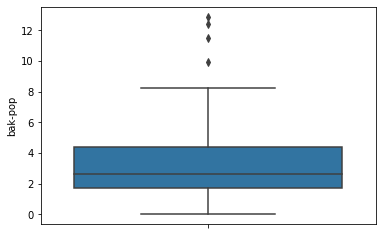

In [19]:
ax = sbn.boxplot(y="bak-pop",data=dfmerged, orient="v")

In [20]:
pbavg = dfmerged["bakery_count"].sum()*10000/dfmerged["population"].sum()
pbfquar = dfmerged["bak-pop"].quantile(0.25)
print(pbavg, pbfquar)

3.0124608104168815 1.7398548226087174


#### Then we filter the dataframe by results of density under the first quartile.

In [21]:
bakneigh = dfmerged[dfmerged["bak-pop"] < pbfquar]
bakneigh

,neighborhood,population,avg_income,bakery_count,bak-pop
6,ALTO SANTA TEREZINHA,7703,112,0.0,0.000000
17,BREJO DA GUABIRABA,11732,150,2.0,1.704739
21,CAJUEIRO,6584,510,1.0,1.518834
25,CASA FORTE,6750,2000,1.0,1.481481
27,CIDADE UNIVERSITARIA,818,400,0.0,0.000000
32,CORREGO DO JENIPAPO,9246,200,0.0,0.000000
33,CURADO,16418,300,2.0,1.218175
34,DERBY,2071,1020,0.0,0.000000
36,DOIS UNIDOS,32905,100,1.0,0.303905
39,ESPINHEIRO,10438,1200,1.0,0.958038


#### Finally we get the top 5 neighborhoods with highest average income to get the possible neighborhoods to open a sourdough bakery in Recife

In [22]:
bakneigh.sort_values(by="avg_income", ascending=False).head(5)

,neighborhood,population,avg_income,bakery_count,bak-pop
25,CASA FORTE,6750,2000,1.0,1.481481
65,PAISSANDU,507,1225,0.0,0.000000
39,ESPINHEIRO,10438,1200,1.0,0.958038
34,DERBY,2071,1020,0.0,0.000000
88,TORREAO,1083,1000,0.0,0.000000
